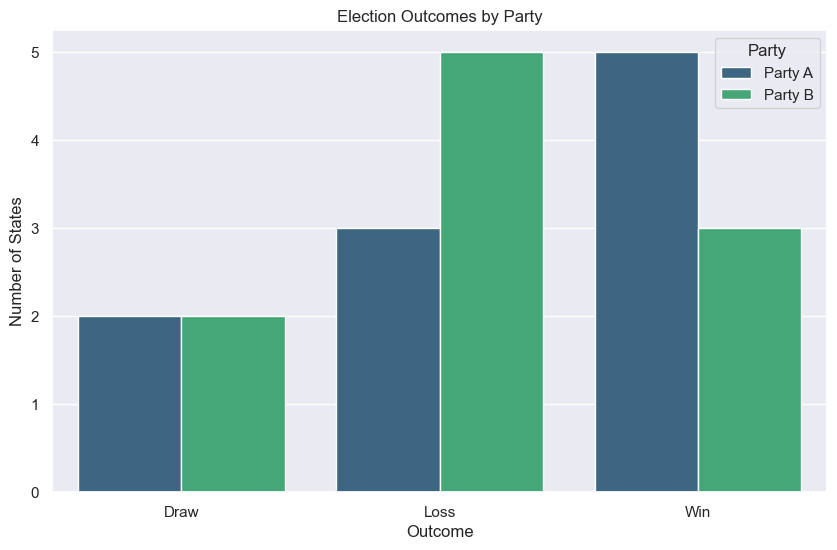

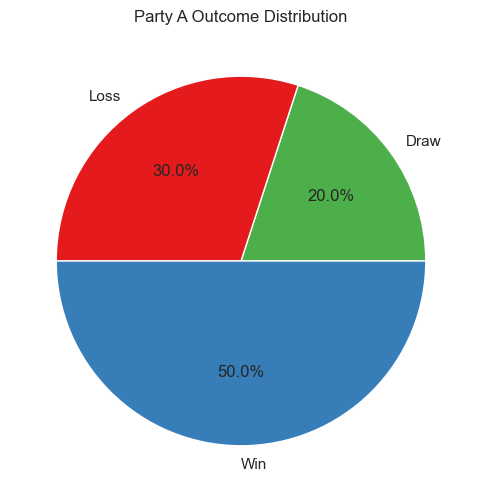

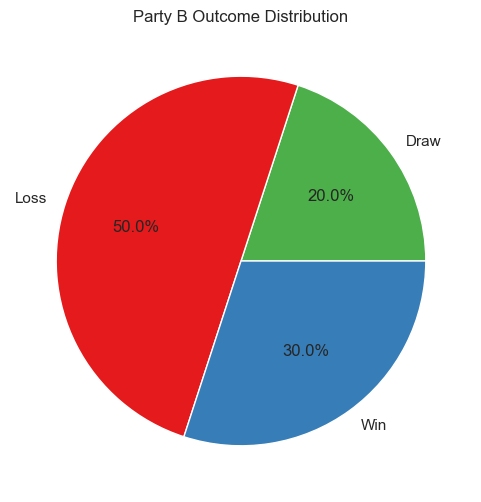

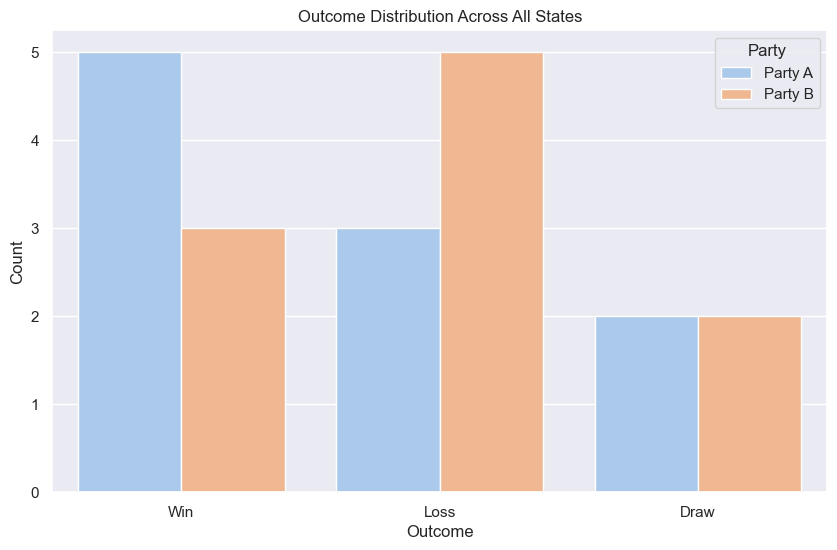

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample election data for 10 states with win, loss, and draw outcomes
data = {
    'State': ['State 1', 'State 2', 'State 3', 'State 4', 'State 5', 
              'State 6', 'State 7', 'State 8', 'State 9', 'State 10'],
    'Party A': ['Win', 'Loss', 'Win', 'Draw', 'Win', 'Loss', 'Win', 'Draw', 'Loss', 'Win'],
    'Party B': ['Loss', 'Win', 'Loss', 'Draw', 'Loss', 'Win', 'Loss', 'Draw', 'Win', 'Loss']
}

# Create DataFrame
df = pd.DataFrame(data)

# Count occurrences of each outcome for each party
results = df.melt(id_vars='State', var_name='Party', value_name='Result')
outcome_counts = results.groupby(['Party', 'Result']).size().reset_index(name='Count')

# Set Seaborn theme
sns.set_theme()

# 1. Bar Chart - Outcome Counts for Each Party
plt.figure(figsize=(10, 6))
sns.barplot(data=outcome_counts, x='Result', y='Count', hue='Party', palette='viridis')
plt.title('Election Outcomes by Party')
plt.xlabel('Outcome')
plt.ylabel('Number of States')
plt.show()

# 2. Pie Chart - Total Outcome Distribution for Party A and Party B
# Calculating outcome distribution for each party
party_a_counts = outcome_counts[outcome_counts['Party'] == 'Party A'].set_index('Result')['Count']
party_b_counts = outcome_counts[outcome_counts['Party'] == 'Party B'].set_index('Result')['Count']

# Pie chart for Party A
plt.figure(figsize=(6, 6))
party_a_counts.plot.pie(autopct='%1.1f%%', colors=['#4daf4a', '#e41a1c', '#377eb8'], title='Party A Outcome Distribution')
plt.ylabel('')
plt.show()

# Pie chart for Party B
plt.figure(figsize=(6, 6))
party_b_counts.plot.pie(autopct='%1.1f%%', colors=['#4daf4a', '#e41a1c', '#377eb8'], title='Party B Outcome Distribution')
plt.ylabel('')
plt.show()

# 3. Count Plot - Outcome Distribution Across All States for Each Party
plt.figure(figsize=(10, 6))
sns.countplot(data=results, x='Result', hue='Party', palette='pastel')
plt.title('Outcome Distribution Across All States')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()